In [2]:
%matplotlib inline
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 6]
matplotlib.rcParams['font.size'] = 16 

## Analytic Exercise #2 (numerical addendum)

The noise in a data set is determined by the Poisson noise in
the expectation value of the signal. However, observationally we often
only have access to one realization of the signal, and often the
quoted errors are based on the Poisson noise in that signal.  If we
take multiple observations and combine them together weighting by the
inverse variance estimated in this way, it leads to a bias. Ignoring
any background contribution to the noise, estimate this bias as a
function of $n$.

In [18]:
def analytic_biased_mean(nbar, N):
    bm = (nbar / (1. + 1. / nbar) * 
          (1. + (1. / N) * (1. / nbar) * (1. - 1 / nbar) / (1. + 1. / nbar)**2))
    return(bm)

In [19]:
def mc_biased_mean(nbar, N, ntrial=100000):
    ntrial = 100000
    nest = np.zeros(ntrial, dtype=np.float32)
    for j in np.arange(ntrial, dtype=np.int32):
        ni = np.float32(np.random.poisson(lam=nbar, size=N))
        ni[ni == 0.] = 1.
        nest[j] = np.float32(N) / (1. / ni).sum()
    return(nest.mean())

In [20]:
N = 10
nnbars = 100
nbars = 0.5 + (100. - 0.5) * np.arange(nnbars, dtype=np.float32) / np.float32(nnbars - 1)
analytics = np.zeros(nnbars, dtype=np.float32)
mcs = np.zeros(nnbars, dtype=np.float32)
for i in np.arange(nnbars, dtype=np.int32):
    print(i)
    nbar = nbars[i]
    analytics[i] = analytic_biased_mean(nbar, N)
    mcs[i] = mc_biased_mean(nbar, N)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


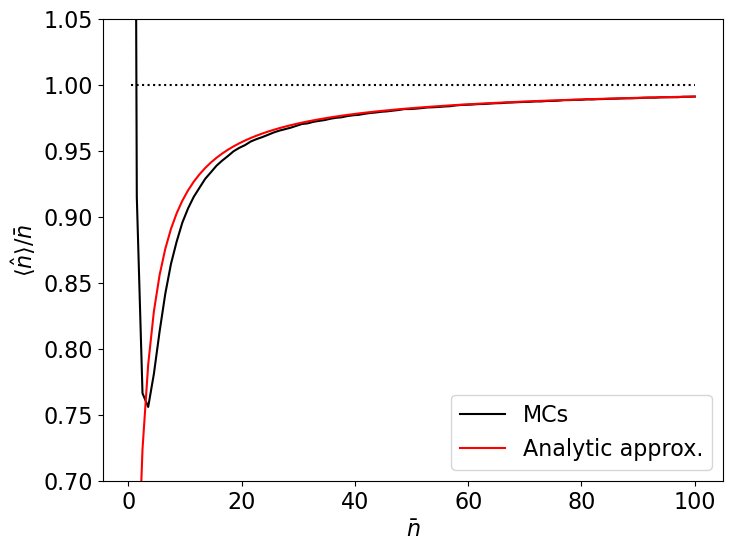

In [23]:
plt.plot(nbars, mcs / nbars, color='black', label='MCs')
plt.plot(nbars, analytics / nbars, color='red', label='Analytic approx.')
plt.plot(nbars, np.ones(nnbars, dtype=np.float32), color='black', linestyle='dotted')
plt.xlabel(r'$\bar n$')
plt.ylabel(r'$\langle \hat n \rangle / \bar n$')
plt.ylim([0.70, 1.05])
plt.legend()

When $\bar n$ is low, using $n$ as an estimate of its own variance gets very lousy, and the estimate of $n$ from multiple observations averaged by the inverse variance is very overestimated. This can be changed depending on how $n=0$ observations are treated.

At higher $\bar n$ the estimate gets better but generally will lead to an underestimate. The approximate model for this bias is not bad above $\bar n \sim 10$ or so (depending on the precision you need!). Note that this implies that even for $\bar n \approx 100$, using the data itself for an inverse variance estimate leads to a 1\% bias.